# Problem 3

(x, y) = (0.014600000000000002, 0.016300000000000002)
Be = [[-130.43478261    0.           57.97101449    0.           72.46376812
     0.        ]
 [   0.          -86.95652174    0.          -72.46376812    0.
   159.42028986]
 [ -86.95652174 -130.43478261  -72.46376812   57.97101449  159.42028986
    72.46376812]]
u = [3.83e-05 1.55e-05]
eps = [-0.00056522  0.00068116  0.00081159]
sig = [[-8.32775920e+07  1.18060201e+08  6.55518395e+07]]
0.015333333333333334 0.013666666666666667 [[30666.66666667]
 [  628.66666667]] [[-130.43478261    0.           57.97101449    0.           72.46376812
     0.        ]
 [   0.          -86.95652174    0.          -72.46376812    0.
   159.42028986]
 [ -86.95652174 -130.43478261  -72.46376812   57.97101449  159.42028986
    72.46376812]] 6.9e-05
[[0.00529   ]
 [0.00010844]
 [0.00529   ]
 [0.00010844]
 [0.00529   ]
 [0.00010845]]


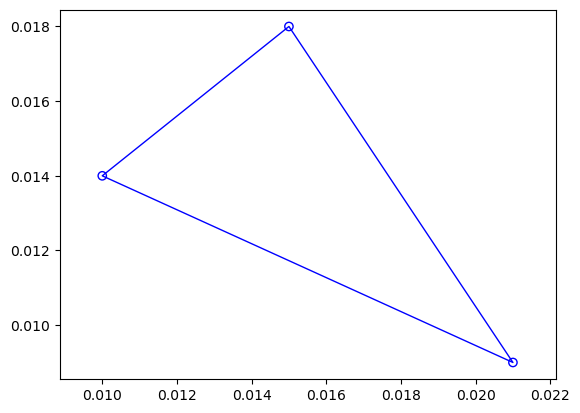

In [5]:
# %% Problem 3b
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv

# Coordinates of the element nodes
ex = np.array([10, 21, 15]) * 1e-3
ey = np.array([14, 9, 18]) * 1e-3
ae = np.array([4.1, 1.0, 3.5, 1.6, 3.8, 1.7])*1e-5  

cfv.eldraw2(ex, ey) # not necessary for the solution

t = 15e-3     # thickness [m]
D = cfc.hooke(1, 210e9, 0.3) # Constitutive matrix for plane stress

def compute_N_B_detJ_xy(xi, eta, xe, ye):
    # Function to compute shape functions, derivatives, and determinant of Jacobian

    # Shape functions 𝐍
    N3 = 1 - xi - eta
    N1 = xi
    N2 = eta
    Ne = np.array([N1, N2, N3])
    # print(Ne)
    x = Ne @ ex
    y = Ne @ ey

    # d𝐍/d𝛏 
    # dN1_dxi = -1; dN2_dxi = 1; dN3_dxi = 0
    # dN1_deta = -1; dN2_deta = 0; dN3_deta = 1
    dN1_dxi = 1; dN2_dxi = 0; dN3_dxi = -1
    dN1_deta = 0; dN2_deta = 1; dN3_deta = -1
    
    dN_dxi = np.array([dN1_dxi, dN2_dxi, dN3_dxi])
    dN_deta = np.array([dN1_deta, dN2_deta, dN3_deta])

    dx_dxi = dN_dxi @ xe
    dx_deta = dN_deta @ xe
    dy_dxi = dN_dxi @ ye
    dy_deta = dN_deta @ ye

    # Jacobian matrix
    J = np.array([[dx_dxi, dx_deta],
                  [dy_dxi, dy_deta]])
    detJ = np.linalg.det(J)

    # derivatives of the shape functions wrt x, and y
    # d𝐍/d𝐱 = 𝐉⁻ᵀ⋅ d𝐍/d𝛏     
    Be_ = np.linalg.inv(J.T) @ np.array([dN_dxi, dN_deta]) 
    
    # Construct Be-matrix
    Be = np.zeros((3, 6))
    Be[0, 0::2] = Be_[0, :]
    Be[1, 1::2] = Be_[1, :]
    Be[2, 0::2] = Be_[1, :]
    Be[2, 1::2] = Be_[0, :]

    Ne_ = np.array([
        [Ne[0], 0, Ne[1], 0, Ne[2], 0],
        [0, Ne[0], 0, Ne[1], 0, Ne[2]]
    ])
    return Ne_, Be, detJ, x, y

Ne, Be, detJ, x, y = compute_N_B_detJ_xy(xi=0.2, eta=0.1, xe=ex, ye=ey)
print(f"(x, y) = {x, y}")
u = Ne @ ae
eps = Be @ ae
sig = D @ eps

print(f"Be = {Be}")
print(f"u = {u}")
print(f"eps = {eps}")
print(f"sig = {sig}")

# Load vector, integration using 1 point
Ne, Be, detJ, x, y = compute_N_B_detJ_xy(xi=1/3, eta=1/3, xe=ex, ye=ey)
b = np.array([[2*x], [3*x*y]])*1e6
W = 1/2
dV = detJ * W * t # Volume element
fe = Ne.T @ b * dV

print(x, y, b, Be, detJ)
print(fe)

## Problem 2

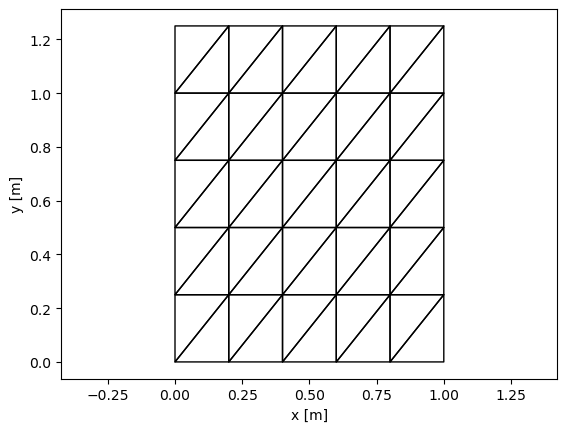

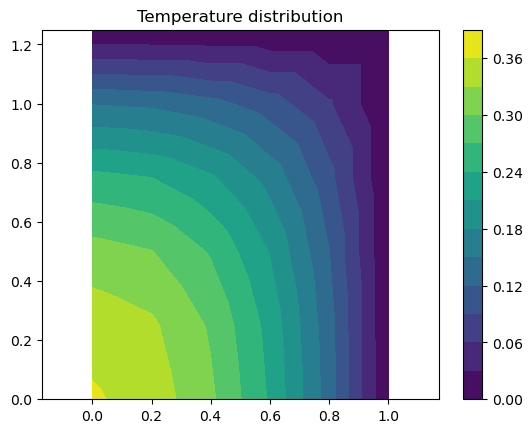

In [2]:
"""
Problem 2 
Anonumous code: 
"""

# General packages
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# CALFEM packages
import calfem.core as cfc
import calfem.vis_mpl as cfv

# Load mesh data
mesh = scipy.io.loadmat('mesh_data.mat') 
Coord = mesh['Coord']                         # [x, y] coords for each node
Dofs = mesh['Dofs']                           
Edof = mesh['Edof']                           # [element number, dof1, dof2, dof3]
Ex = mesh['Ex']                                
Ey = mesh['Ey']      
bottom_dofs = mesh['bottom_dofs']                          
right_dofs = mesh['right_dofs']                          
top_dofs = mesh['top_dofs']                          
left_dofs = mesh['left_dofs']                          

# Plot the mesh
plotpar = np.array([1, 1, 2]) # parameters for line style, color, marker 
cfv.eldraw2(Ex, Ey, plotpar)
plt.xlabel("x [m]")
plt.ylabel("y [m]")

# load reference solution vector
a_ref = scipy.io.loadmat('solution.mat')['solution_vector'] 
Ed = cfc.extract_ed(Edof[:, 1:4], a_ref)

# plot reference temperature
plt.figure()
plt.title("Temperature distribution")
plt.axis("equal")
cfv.draw_nodal_values_contourf(a_ref, Coord, Edof[:, 1:4])
plt.colorbar()

# Start your implementation here